In [1]:
from __future__ import print_function

# Importing the Dataset

In [2]:
import pandas as pd
import numpy as np
import patsy
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import pyplot

# linear regression feature importance
from sklearn.datasets import make_regression

from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [3]:
yellow_trip_df = pd.read_csv('Yellow_tripdata_2019-10.csv')

In [4]:
yellow_trip_df
pd.set_option('display.max_columns', 50)

In [5]:
yellow_trip_df

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,1.0,2019-10-01 00:19:55,2019-10-01 00:23:57,1.0,0.40,1.0,N,48,163,2.0,4.50,3.00,0.5,0.0,0.00,0.3,8.30,2.5
1,1.0,2019-10-01 00:40:19,2019-10-01 00:55:17,2.0,4.30,1.0,N,144,141,1.0,14.50,3.00,0.5,2.0,0.00,0.3,20.30,2.5
2,1.0,2019-10-01 00:06:52,2019-10-01 00:21:23,1.0,5.00,1.0,N,137,80,1.0,17.00,3.00,0.5,5.2,0.00,0.3,26.00,2.5
3,2.0,2019-10-01 00:36:08,2019-10-01 00:36:15,1.0,0.00,1.0,N,25,25,4.0,-2.50,-0.50,-0.5,0.0,0.00,-0.3,-3.80,0.0
4,2.0,2019-10-01 00:36:08,2019-10-01 00:36:15,1.0,0.00,1.0,N,25,25,2.0,2.50,0.50,0.5,0.0,0.00,0.3,3.80,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7213886,NaN,2019-10-31 23:20:00,2019-10-31 23:56:00,NaN,19.53,NaN,NaN,77,119,NaN,63.83,2.75,0.5,0.0,6.12,0.3,73.50,0.0
7213887,NaN,2019-10-31 23:42:00,2019-11-01 00:07:00,NaN,4.96,NaN,NaN,238,137,NaN,28.95,2.75,0.5,0.0,0.00,0.3,32.50,0.0
7213888,NaN,2019-10-31 23:50:35,2019-11-01 00:08:45,NaN,4.63,NaN,NaN,186,166,NaN,29.26,2.75,0.0,0.0,0.00,0.3,32.31,0.0
7213889,NaN,2019-10-31 23:29:26,2019-10-31 23:59:15,NaN,17.49,NaN,NaN,45,122,NaN,54.25,2.75,0.0,0.0,6.12,0.3,63.42,0.0


In [6]:
#taxi_zone_cord = pd.read_csv('taxi_zone_lookup_coordinates.csv')

In [7]:
#taxi_zone_cord

In [8]:
#taxi_zone_df = pd.read_csv('taxi+_zone_lookup.csv')

In [9]:
#taxi_zone_df

In [10]:
#yellow_trip_df['LocationID']=yellow_trip_df['PULocationID']

In [11]:
#yellow_trip_df

In [12]:
#xxx=pd.merge(yellow_trip_df,taxi_zone_cord,on='LocationID')

In [13]:
#xxx

In [14]:
#xxx.rename(columns={'latitude':'PUlatitude','longitude':'PUlogtitude'})

## Add all coordinates for DOlocation Zone

In [15]:
#taxi_zone_cord['LocationID1']=taxi_zone_cord['LocationID']

In [16]:
#taxi_zone_cord

In [17]:
#yellow_trip_df['LocationID1']=yellow_trip_df['DOLocationID']

In [18]:
#xxx.merge(yellow_trip_df,taxi_zone_cord,on='LocationID1')

In [19]:
#xxx['DOlatitude'] = xxx.groupby('PULocationID')['PUlatitude'].sort_values(ascending=False)
#xxx['DOlatitude']

# Exploring Yellow Trips Data

## Understanding each feature seperately

In [20]:
#Show 5 observation randomly
yellow_trip_df.sample(5)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
6916251,2.0,2019-10-30 22:30:14,2019-10-30 22:44:04,4.0,2.34,1.0,N,148,170,1.0,11.0,0.5,0.5,2.96,0.0,0.3,17.76,2.5
522370,2.0,2019-10-03 10:25:47,2019-10-03 10:46:57,3.0,9.74,1.0,N,132,39,2.0,28.0,0.0,0.5,0.00,0.0,0.3,28.80,0.0
4044119,2.0,2019-10-18 17:17:50,2019-10-18 17:21:47,1.0,0.74,1.0,N,140,236,1.0,5.0,1.0,0.5,1.00,0.0,0.3,10.30,2.5
5732229,1.0,2019-10-25 19:26:45,2019-10-25 20:16:10,1.0,9.70,1.0,N,138,113,1.0,38.5,3.0,0.5,5.00,0.0,0.3,47.30,2.5
3286084,1.0,2019-10-15 16:11:10,2019-10-15 17:06:41,1.0,16.90,2.0,N,132,237,1.0,52.0,7.0,0.5,3.00,0.0,0.3,62.80,2.5


In [21]:
#Inspect in each feature uniqely variables
yellow_trip_df.apply(pd.Series.nunique)

VendorID                       2
tpep_pickup_datetime     2218590
tpep_dropoff_datetime    2221573
passenger_count               10
trip_distance               4555
RatecodeID                     7
store_and_fwd_flag             2
PULocationID                 260
DOLocationID                 261
payment_type                   4
fare_amount                 5396
extra                         48
mta_tax                        9
tip_amount                  3809
tolls_amount                1068
improvement_surcharge          3
total_amount               12652
congestion_surcharge           6
dtype: int64

## Diving deeper to gain insights and each Feature that has less than 10 entries

### 1- VendorID
A code indicating the TPEP provider that provided the record. 

1= Creative Mobile Technologies, LLC;

2= VeriFone Inc.

In [22]:
yellow_trip_df['VendorID'].unique()                  

array([ 1.,  2., nan])

### 2- tpep_pickup_datetime     
contains pickup date and time and dtype object, this will be explored further below.

### 3- tpep_dropoff_datetime
contains dropoff date and time and dtype object, this will be explored further below.

### 4- passenger_count                

 The elapsed trip distance in miles reported by the taximeter

In [23]:
yellow_trip_df['passenger_count'].value_counts()                  

1.0    5063866
2.0    1096061
3.0     296540
5.0     272184
6.0     159337
4.0     141524
0.0     137577
7.0         38
8.0         25
9.0         16
Name: passenger_count, dtype: int64

There is only one trip with 9 passengers count.
Most of trips have only one passenger.

### 5- RateCodeID:
The final rate code in effect at the end of the trip.

1= Standard rate

2=JFK

3=Newark

4=Nassau or Westchester

5=Negotiated fare

6=Group ride

In [24]:
yellow_trip_df['RatecodeID'].unique()

array([ 1.,  5.,  3.,  2.,  4., 99.,  6., nan])

We have only 6 rate code effect at the end of trips which effect also on the fare amount but there is 99. 
we will check it in the training set later to get more info abt it 

### 6-  Store and fwd flag:
This flag indicates whether the trip record was held in vehicle 
memory before sending to the vendor, aka “store and forward,” 
because the vehicle did not have a connection to the server.

Y= store and forward trip

N= not a store and forward trip

In [25]:
yellow_trip_df['store_and_fwd_flag'].unique() 

array(['N', 'Y', nan], dtype=object)

### 7- PULocationID  
TLC Taxi Zone in which the taximeter was engaged

### 8- DOLocationID                 
TLC Taxi Zone in which the taximeter was disengaged

 
### 9-  payment_type:
A numeric code signifying how the passenger paid for the trip. 

1= Credit card

2= Cash

3= No charge

4= Dispute

5= Unknown

6= Voided trip


In [26]:
yellow_trip_df['payment_type'].unique() 

array([ 2.,  1.,  4.,  3., nan])

In [27]:
yellow_trip_df.payment_type.value_counts()

1.0    5215874
2.0    1893584
3.0      39791
4.0      17919
Name: payment_type, dtype: int64

### Show the differences btween these prices and how they effects on the trips's prices

### 10-  Fare_amount:
The time-and-distance fare calculated by the meter 

### 11-  Extra: 
Miscellaneous extras and surcharges. Currently, this only includes
the $0.50 and $1 rush hour and overnight charges

### 12-  mta_tax:
$0.50 MTA tax that is automatically triggered based on the metered 
rate in use.

### 13- tip_amount:
Tip amount – This field is automatically populated for credit card 
tips. Cash tips are not included.

### 14- tolls_amount
Total amount of all tolls paid in trip

### 15- improvement_surcharge:
$0.30 improvement surcharge assessed trips at the flag drop. The 
improvement surcharge began being levied in 2015.

### 16- total amount:
The total amount charged to passengers. Does not include cash tips.

### 17- congestion_surcharge:
On January 1st 2019, New York State’s congestion surcharge will take effect. As a result, trips in taxis and For-Hire Vehicles will be charged a surcharge for trips that start, end or pass through Congestion Zone. The Congestion Zone is Manhattan, south of 96th Street 

### Congestion Surcharge :

$2.50 for non-shared trips in taxicabs

$2.75 for non-shared trips in For-Hire-Vehicles, including limousines, and Street-Hail Liveries (Green Taxis)

OR

$0.75 for shared-rides in any type of vehicle

No surcharge for Access-A-Ride, or any other MTA dispatched trip.


In [28]:
yellow_trip_df['congestion_surcharge'].unique()  #رسوم الازدحام                                                      

array([ 2.5 ,  0.  , -2.5 ,  0.75,  2.75,  0.3 ])

In [29]:
yellow_trip_df['congestion_surcharge'].unique

<bound method Series.unique of 0          2.5
1          2.5
2          2.5
3          0.0
4          0.0
          ... 
7213886    0.0
7213887    0.0
7213888    0.0
7213889    0.0
7213890    0.0
Name: congestion_surcharge, Length: 7213891, dtype: float64>

In [30]:
# $0.50 MTA tax that is automatically triggered based on the metered rate in use.
yellow_trip_df['mta_tax'].unique()                         

array([ 0.5 , -0.5 ,  0.  ,  3.3 ,  0.35, 19.42,  0.25,  1.1 , 60.  ])

In [31]:
# The number of passengers in the vehicle. This is a driver-entered value.
yellow_trip_df['improvement_surcharge'].unique()                  

array([ 0.3, -0.3,  0. ])

## Creating some new important  features

In [32]:
# convert the type of 'tpep_pickup_datetime' & 'tpep_dropoff_datetime' to DateTime Type
yellow_trip_df['tpep_pickup_datetime']=pd.to_datetime(yellow_trip_df['tpep_pickup_datetime'])
yellow_trip_df['tpep_dropoff_datetime']=pd.to_datetime(yellow_trip_df['tpep_dropoff_datetime'])

In [33]:
#Now, extract and create a new feature 'Day' & 'Hour' from the above two coulmns,Monday=0 and Sunday=6
yellow_trip_df['pickup_day_num']=yellow_trip_df['tpep_pickup_datetime'].dt.weekday
yellow_trip_df['dropoff_day_num']=yellow_trip_df['tpep_dropoff_datetime'].dt.weekday

yellow_trip_df['pickup_day_30']=yellow_trip_df['tpep_pickup_datetime'].dt.day
yellow_trip_df['dropoff_day_30']=yellow_trip_df['tpep_dropoff_datetime'].dt.day


In [34]:
yellow_trip_df.sample(5)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,pickup_day_num,dropoff_day_num,pickup_day_30,dropoff_day_30
6345757,2.0,2019-10-28 15:14:02,2019-10-28 15:27:12,1.0,2.22,1.0,N,79,231,1.0,11.0,0.0,0.5,1.43,0.0,0.3,15.73,2.5,0,0,28,28
6294878,2.0,2019-10-28 10:09:08,2019-10-28 10:29:00,3.0,1.89,1.0,N,141,161,1.0,13.0,0.0,0.5,1.50,0.0,0.3,17.80,2.5,0,0,28,28
1516719,2.0,2019-10-07 17:21:37,2019-10-07 17:26:30,6.0,0.92,1.0,N,236,236,1.0,5.5,1.0,0.5,1.00,0.0,0.3,10.80,2.5,0,0,7,7
5716866,1.0,2019-10-25 18:09:34,2019-10-25 18:21:28,0.0,2.40,1.0,N,162,263,2.0,10.0,3.5,0.5,0.00,0.0,0.3,14.30,2.5,4,4,25,25
5279785,1.0,2019-10-23 23:43:00,2019-10-23 23:48:46,1.0,1.60,1.0,N,79,170,1.0,6.5,3.0,0.5,1.00,0.0,0.3,11.30,2.5,2,2,23,23


In [35]:
# Also extract and create another feature 'Hour'in the 24-hour format., from 'tpep_pickup_datetime' & 'tpep_pickup_datetime'  
yellow_trip_df['pickup_hour']=yellow_trip_df['tpep_pickup_datetime'].dt.hour
yellow_trip_df['dropoff_hour']=yellow_trip_df['tpep_dropoff_datetime'].dt.hour

In [36]:
yellow_trip_df.tail()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,pickup_day_num,dropoff_day_num,pickup_day_30,dropoff_day_30,pickup_hour,dropoff_hour
7213886,NaN,2019-10-31 23:20:00,2019-10-31 23:56:00,NaN,19.53,NaN,NaN,77,119,NaN,63.83,2.75,0.5,0.0,6.12,0.3,73.50,0.0,3,3,31,31,23,23
7213887,NaN,2019-10-31 23:42:00,2019-11-01 00:07:00,NaN,4.96,NaN,NaN,238,137,NaN,28.95,2.75,0.5,0.0,0.00,0.3,32.50,0.0,3,4,31,1,23,0
7213888,NaN,2019-10-31 23:50:35,2019-11-01 00:08:45,NaN,4.63,NaN,NaN,186,166,NaN,29.26,2.75,0.0,0.0,0.00,0.3,32.31,0.0,3,4,31,1,23,0
7213889,NaN,2019-10-31 23:29:26,2019-10-31 23:59:15,NaN,17.49,NaN,NaN,45,122,NaN,54.25,2.75,0.0,0.0,6.12,0.3,63.42,0.0,3,3,31,31,23,23
7213890,NaN,2019-10-31 23:52:00,2019-11-01 00:39:00,NaN,15.97,NaN,NaN,140,91,NaN,39.62,2.75,0.5,0.0,6.12,0.3,49.29,0.0,3,4,31,1,23,0


### Polynomial Features:
to improve our features and the for  of our hypothesis function by combining multiple features into one. 
so i think this feature the most significant target that i'll used later to predict the trip duration.

In [37]:
yellow_trip_df['trip_duration'] = (yellow_trip_df['tpep_dropoff_datetime'] - yellow_trip_df['tpep_pickup_datetime']).dt.total_seconds()/60
yellow_trip_df.sample(5)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,pickup_day_num,dropoff_day_num,pickup_day_30,dropoff_day_30,pickup_hour,dropoff_hour,trip_duration
6191457,2.0,2019-10-27 18:50:45,2019-10-27 19:36:44,1.0,6.33,1.0,N,162,37,1.0,30.5,0.0,0.5,7.98,6.12,0.3,47.90,2.5,6,6,27,27,18,19,45.983333
4150452,2.0,2019-10-19 00:59:41,2019-10-19 01:04:51,1.0,0.81,1.0,N,163,48,2.0,5.5,0.5,0.5,0.00,0.00,0.3,9.30,2.5,5,5,19,19,0,1,5.166667
4750892,1.0,2019-10-21 19:54:30,2019-10-21 19:59:28,1.0,0.60,1.0,N,236,262,2.0,5.0,3.5,0.5,0.00,0.00,0.3,9.30,2.5,0,0,21,21,19,19,4.966667
396994,1.0,2019-10-02 19:05:53,2019-10-02 19:36:52,1.0,6.00,1.0,N,234,33,1.0,23.0,3.5,0.5,4.10,0.00,0.3,31.40,2.5,2,2,2,2,19,19,30.983333
2091182,2.0,2019-10-10 08:46:40,2019-10-10 09:19:51,1.0,2.60,1.0,N,230,107,1.0,20.5,0.0,0.5,4.76,0.00,0.3,28.56,2.5,3,3,10,10,8,9,33.183333


## Split yellow-tripd-data to training, validation and test sets

In [38]:
df_train_val, df_test = train_test_split(yellow_trip_df, test_size=0.10, random_state=0)

In [39]:
df_train_val.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6492501 entries, 4105733 to 4500015
Data columns (total 25 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               float64       
 1   tpep_pickup_datetime   datetime64[ns]
 2   tpep_dropoff_datetime  datetime64[ns]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           float64       
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  pickup_day_num  

In [40]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 721390 entries, 5964823 to 4983310
Data columns (total 25 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   VendorID               716789 non-null  float64       
 1   tpep_pickup_datetime   721390 non-null  datetime64[ns]
 2   tpep_dropoff_datetime  721390 non-null  datetime64[ns]
 3   passenger_count        716789 non-null  float64       
 4   trip_distance          721390 non-null  float64       
 5   RatecodeID             716789 non-null  float64       
 6   store_and_fwd_flag     716789 non-null  object        
 7   PULocationID           721390 non-null  int64         
 8   DOLocationID           721390 non-null  int64         
 9   payment_type           716789 non-null  float64       
 10  fare_amount            721390 non-null  float64       
 11  extra                  721390 non-null  float64       
 12  mta_tax                721390 non-nul

## Cleanind and Preprocessing Training & Validation Dataset

In [41]:
#chech columns names
df_train_val.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'pickup_day_num',
       'dropoff_day_num', 'pickup_day_30', 'dropoff_day_30', 'pickup_hour',
       'dropoff_hour', 'trip_duration'],
      dtype='object')

In [42]:
#Show the missing values
df_train_val.isna().sum()

VendorID                 42122
tpep_pickup_datetime         0
tpep_dropoff_datetime        0
passenger_count          42122
trip_distance                0
RatecodeID               42122
store_and_fwd_flag       42122
PULocationID                 0
DOLocationID                 0
payment_type             42122
fare_amount                  0
extra                        0
mta_tax                      0
tip_amount                   0
tolls_amount                 0
improvement_surcharge        0
total_amount                 0
congestion_surcharge         0
pickup_day_num               0
dropoff_day_num              0
pickup_day_30                0
dropoff_day_30               0
pickup_hour                  0
dropoff_hour                 0
trip_duration                0
dtype: int64

In [43]:
#drop the missing values
df_train_val = df_train_val.dropna(how = 'any')
df_test = df_test.dropna(how = 'any')

In [44]:
#drop duplicated rows
df_train_val.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,pickup_day_num,dropoff_day_num,pickup_day_30,dropoff_day_30,pickup_hour,dropoff_hour,trip_duration
4105733,1.0,2019-10-18 21:29:40,2019-10-18 21:35:48,1.0,0.50,1.0,N,48,230,1.0,5.5,3.0,0.5,1.86,0.0,0.3,11.16,2.5,4,4,18,18,21,21,6.133333
1489464,1.0,2019-10-07 14:11:02,2019-10-07 14:22:17,1.0,1.00,1.0,N,237,236,1.0,8.5,2.5,0.5,2.35,0.0,0.3,14.15,2.5,0,0,7,7,14,14,11.250000
2523390,2.0,2019-10-11 21:06:52,2019-10-11 21:12:58,5.0,0.66,1.0,N,7,7,2.0,5.5,0.5,0.5,0.00,0.0,0.3,6.80,0.0,4,4,11,11,21,21,6.100000
3723990,2.0,2019-10-17 11:58:59,2019-10-17 12:14:18,2.0,3.10,1.0,N,211,246,2.0,13.5,0.0,0.5,0.00,0.0,0.3,16.80,2.5,3,3,17,17,11,12,15.316667
1316130,2.0,2019-10-06 16:25:39,2019-10-06 16:35:14,1.0,0.70,1.0,N,233,229,1.0,7.5,0.0,0.5,2.05,0.0,0.3,12.85,2.5,6,6,6,6,16,16,9.583333


In [45]:
df_train_val.isna().sum()

VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
RatecodeID               0
store_and_fwd_flag       0
PULocationID             0
DOLocationID             0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
congestion_surcharge     0
pickup_day_num           0
dropoff_day_num          0
pickup_day_30            0
dropoff_day_30           0
pickup_hour              0
dropoff_hour             0
trip_duration            0
dtype: int64

## General Visualizaion

### Display total profit amount for yellow trips per day


<AxesSubplot:xlabel='pickup_day_num', ylabel='total_amount'>

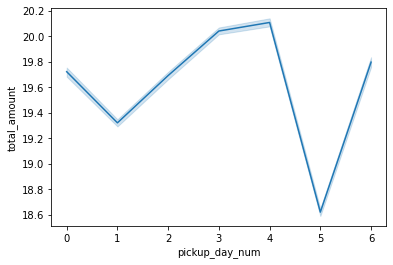

In [46]:
sns.lineplot(x='pickup_day_num',y='total_amount',data=df_train_val)

### Display most pickup & dropoff passengers zones


In [47]:
top_5_zone=df_train_val.PULocationID.value_counts(ascending=False).head()
top_5_zone1=df_train_val.DOLocationID.value_counts(ascending=False).head()
top_5_zone

237    300939
161    272809
236    268429
162    235475
186    230807
Name: PULocationID, dtype: int64

In [48]:
top_5_zone1

236    280673
237    269534
161    256394
230    198621
162    198268
Name: DOLocationID, dtype: int64

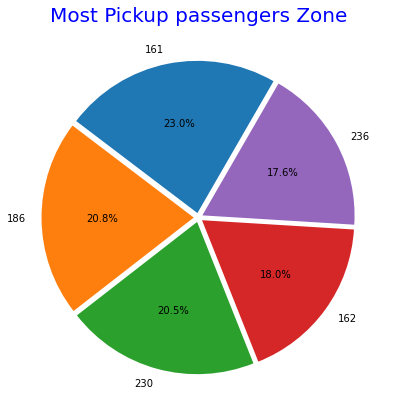

In [49]:
plt.figure(figsize = [9,7])
plt.title('Most Pickup passengers Zone',fontsize=20,color = 'b')

explode = (0.03, 0.03, 0.03, 0.03, 0.03)
labels = ['161','186','230','162','236']


plt.pie(x=top_5_zone, explode=explode,startangle=60, labels=labels,autopct='%0.01f%%')

plt.show()


### Display most drop off zone


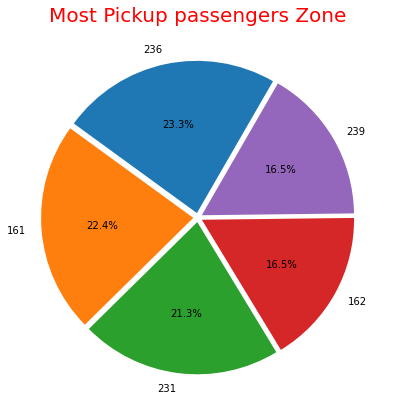

In [50]:
plt.figure(figsize = [9,7])
plt.title('Most Pickup passengers Zone',fontsize=20,color = 'r')

explode = (0.03, 0.03, 0.03, 0.03, 0.03)
labels = ['236','161','231','162','239']


plt.pie(x=top_5_zone1, explode=explode,startangle=60, labels=labels,autopct='%0.01f%%')

plt.show()

### Display most pickup & dropoff hours

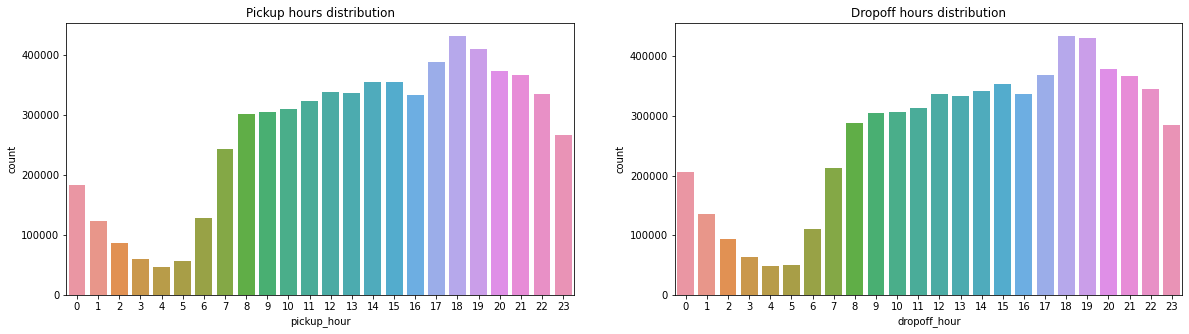

In [51]:
figure,(ax1,ax2)=plt.subplots(ncols=2,figsize=(20,5))
ax1.set_title('Pickup hours distribution')
ax=sns.countplot(x="pickup_hour",data=df_train_val,ax=ax1)
ax2.set_title('Dropoff hours distribution')
ax=sns.countplot(x="dropoff_hour",data=df_train_val,ax=ax2)

### Display most pickup & dropoff days

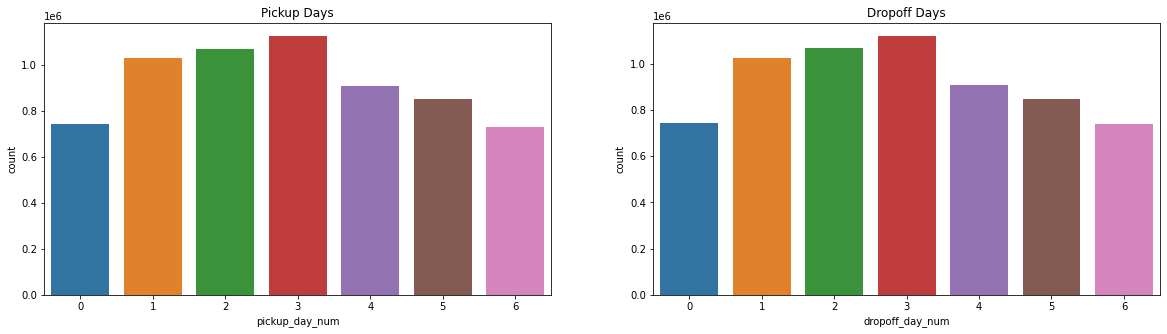

In [52]:
figure,(ax1,ax2)=plt.subplots(ncols=2,figsize=(20,5))
ax1.set_title('Pickup Days')
ax=sns.countplot(x="pickup_day_num",data=df_train_val,ax=ax1)
ax2.set_title('Dropoff Days')
ax=sns.countplot(x="dropoff_day_num",data=df_train_val,ax=ax2)


In [53]:
df_train_val['pickup_day_num'].value_counts().sort_values(ascending=False)

3    1124463
2    1068944
1    1027291
4     907762
5     849231
0     743193
6     729495
Name: pickup_day_num, dtype: int64

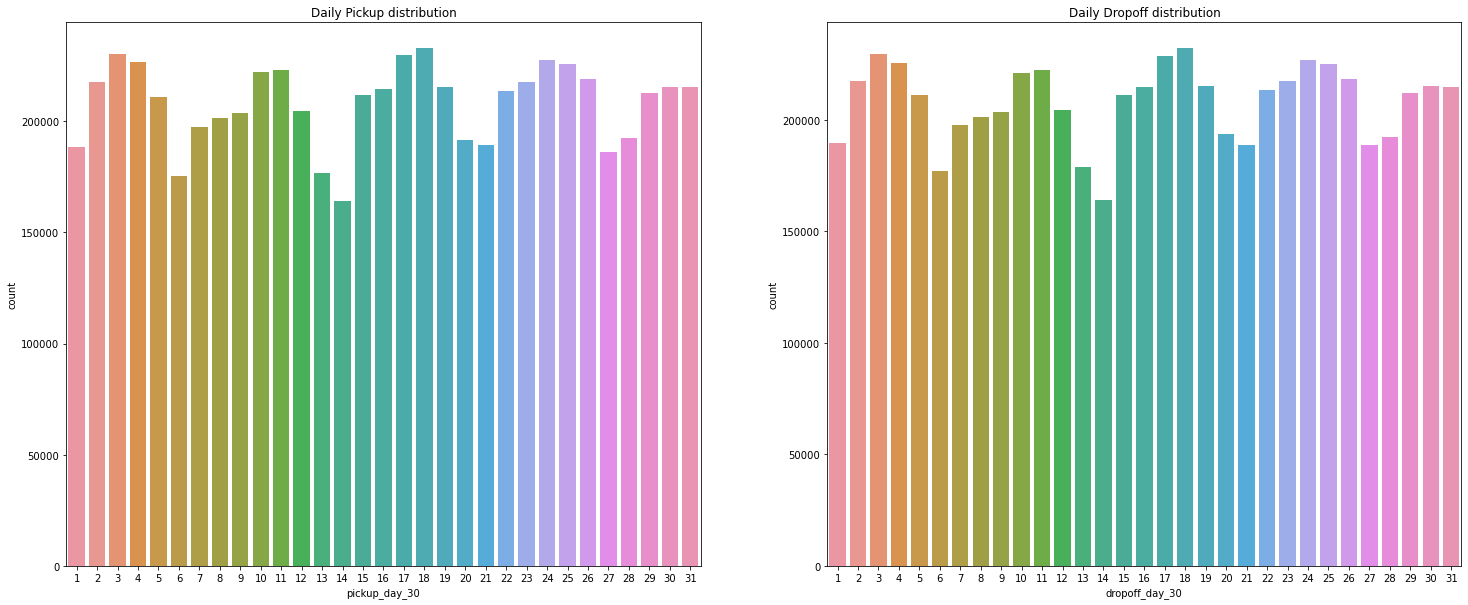

In [54]:
figure,(ax1,ax2)=plt.subplots(ncols=2,figsize=(25,10))
ax1.set_title('Daily Pickup distribution')
ax=sns.countplot(x="pickup_day_30",data=df_train_val,ax=ax1)
ax2.set_title('Daily Dropoff distribution')
ax=sns.countplot(x="dropoff_day_30",data=df_train_val,ax=ax2)

From the figure above we can conculde many of trips on thursday and Friday

### Display the number of pickup Passengers per hour 


<Figure size 1368x1080 with 0 Axes>

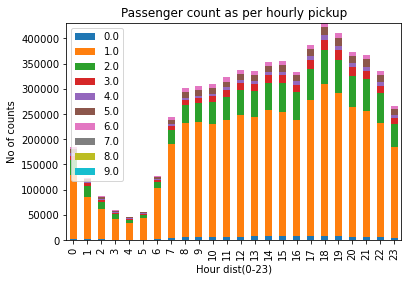

In [55]:
#Passenger count as per hourly pickup
plt.figure(figsize=(19,15))
passenger_per_hour=df_train_val.groupby(['pickup_hour','passenger_count']).size().unstack()
passenger_per_hour.plot(kind='bar',stacked=True,legend=False)
plt.xlabel('Hour dist(0-23)')
plt.ylabel('No of counts')
plt.title('Passenger count as per hourly pickup')
plt.legend(loc="upper left")

In [56]:
df_train_val.passenger_count.value_counts()

1.0    4557252
2.0     986644
3.0     267097
5.0     244973
6.0     143291
4.0     127194
0.0     123858
7.0         33
8.0         23
9.0         14
Name: passenger_count, dtype: int64

We can see about (34643) of trips have 0 passengers that maybe cancelled for some circumestances
as we should drop the outlier

In [57]:
df_train_val=df_train_val[df_train_val['passenger_count']!=0]
df_test=df_test[df_test['passenger_count']!=0]

In [58]:
df_train_val.passenger_count.value_counts()

1.0    4557252
2.0     986644
3.0     267097
5.0     244973
6.0     143291
4.0     127194
7.0         33
8.0         23
9.0         14
Name: passenger_count, dtype: int64

In [59]:
df_train_val.RatecodeID.value_counts()

1.0     6094921
2.0      178024
5.0       32277
3.0       15947
4.0        5048
99.0        269
6.0          35
Name: RatecodeID, dtype: int64

In [60]:
df_train_val[df_train_val.RatecodeID==99]

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,pickup_day_num,dropoff_day_num,pickup_day_30,dropoff_day_30,pickup_hour,dropoff_hour,trip_duration
6603333,2.0,2019-10-29 17:48:18,2019-10-29 17:57:44,1.0,0.79,99.0,N,90,68,2.0,7.5,1.0,0.5,0.0,0.0,0.3,11.8,2.5,1,1,29,29,17,17,9.433333
4584093,2.0,2019-10-20 21:50:03,2019-10-20 22:24:20,2.0,5.21,99.0,N,90,262,2.0,24.5,0.5,0.5,0.0,0.0,0.3,28.3,2.5,6,6,20,20,21,22,34.283333
761709,2.0,2019-10-04 09:58:55,2019-10-04 10:07:22,1.0,0.00,99.0,N,181,181,2.0,47.0,0.3,0.0,0.0,0.0,0.0,47.3,0.0,4,4,4,4,9,10,8.450000
4181228,2.0,2019-10-19 06:56:50,2019-10-19 06:57:02,1.0,0.00,99.0,N,142,142,2.0,52.0,0.0,0.5,0.0,0.0,0.3,55.3,2.5,5,5,19,19,6,6,0.200000
1440959,2.0,2019-10-07 10:37:45,2019-10-07 14:16:33,1.0,0.00,99.0,N,207,226,2.0,3.0,0.8,0.5,0.0,0.0,0.0,4.3,0.0,0,0,7,7,10,14,218.800000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5963206,2.0,2019-10-26 19:53:50,2019-10-27 00:05:27,1.0,0.00,99.0,N,145,145,2.0,2.5,0.8,0.5,0.0,0.0,0.0,3.8,0.0,5,6,26,27,19,0,251.616667
4074196,2.0,2019-10-18 19:57:58,2019-10-18 20:13:36,1.0,1.85,99.0,N,164,246,2.0,11.0,1.0,0.5,0.0,0.0,0.3,15.3,2.5,4,4,18,18,19,20,15.633333
1957298,2.0,2019-10-09 16:26:07,2019-10-09 16:37:59,2.0,1.56,99.0,N,68,144,2.0,8.5,1.0,0.5,0.0,0.0,0.3,12.8,2.5,2,2,9,9,16,16,11.866667
1053112,2.0,2019-10-05 13:14:56,2019-10-05 13:26:52,1.0,0.00,99.0,N,193,193,2.0,2.5,0.8,0.5,0.0,0.0,0.0,3.8,0.0,5,5,5,5,13,13,11.933333


Notice there are 269 trips with rate code = 269 and most of trips have 0 passengers and 0 trip_distance ,which mean will drop it of traning set.

In [61]:
#drop the outlier from Ratecode
df_train_val=df_train_val[df_train_val['RatecodeID']!=0]
df_train_val=df_train_val[df_train_val['RatecodeID']<7]
#For test-set
df_test=df_test[df_test['RatecodeID']!=0]
df_test=df_test[df_test['RatecodeID']<7]

In [62]:
df_train_val.RatecodeID.value_counts()

1.0    6094921
2.0     178024
5.0      32277
3.0      15947
4.0       5048
6.0         35
Name: RatecodeID, dtype: int64

Now no outlier,we can draw it to see data

<AxesSubplot:xlabel='RatecodeID', ylabel='fare_amount'>

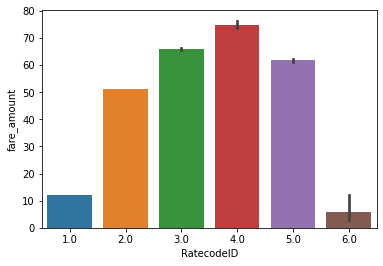

In [63]:
#fare_amount for each rate code id
sns.barplot(y='fare_amount',x='RatecodeID',data=df_train_val)


### Display the hieghest vendors beside on the number of passengers

In [64]:
df_train_val.VendorID.value_counts()

2.0    4216833
1.0    2109419
Name: VendorID, dtype: int64

<AxesSubplot:xlabel='VendorID', ylabel='passenger_count'>

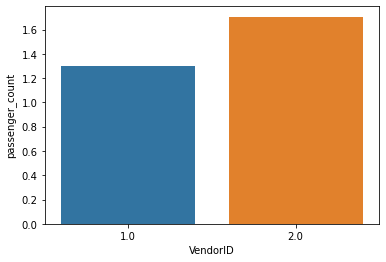

In [65]:
sns.barplot(y='passenger_count',x='VendorID',data=df_train_val)


## Visualizing "univarite feature" to show the distribution and delete the outlier or scalling the feature whenever we need it

## Fare Amount

In [66]:
df_train_val['fare_amount'].value_counts().sort_values(ascending=False)

6.50      294258
6.00      293373
7.00      290954
7.50      281925
5.50      280310
           ...  
64.08          1
22.48          1
111.10         1
42.11          1
30.45          1
Name: fare_amount, Length: 2305, dtype: int64

Text(0.5, 1.0, 'Fare amount trips using drop the outlier')

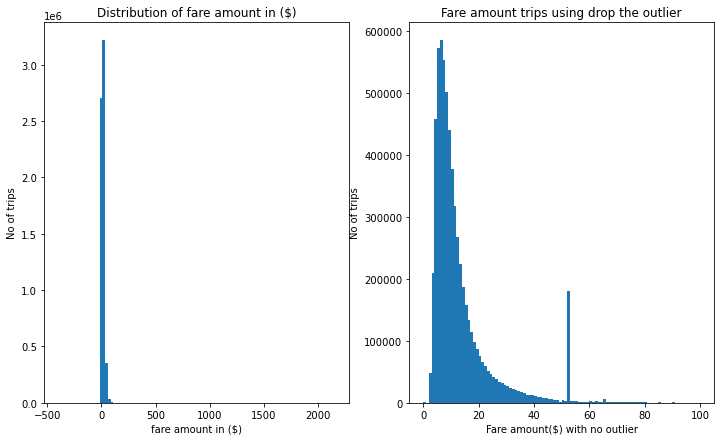

In [67]:
fig, ax = plt.subplots(nrows=1,ncols=2, figsize=(12, 7))
#Plotting histogram
plt.subplot(121)
plt.hist(df_train_val['fare_amount'],bins=100)
plt.xlabel('fare amount in ($)')
plt.ylabel('No of trips')
plt.title('Distribution of fare amount in ($)')


#Plotting histogram with a log transformation
plt.subplot(122)
#drop the outliers
df_train_val=df_train_val[df_train_val.fare_amount>0]
df_train_val=df_train_val[df_train_val.fare_amount<100]

plt.hist(df_train_val['fare_amount'],bins=100)
plt.xlabel('Fare amount($) with no outlier')
plt.ylabel('No of trips')
plt.title('Fare amount trips using drop the outlier')

#Max trips lasted for shorter distances

We see from the histogram above the fare amount between (-50) and ($-60) have a fixed price and there are approximatlly 200000 trips in these prices, let me check in the next step

In [68]:
#for test-set
df_test=df_test[df_test.fare_amount>0]
df_test=df_test[df_test.fare_amount<100]

## Trip Distance

In [69]:
df_train_val['trip_distance'].value_counts().sort_values(ascending=False)  

0.90     113797
0.80     113188
1.00     112912
1.10     107927
0.70     107419
          ...  
31.09         1
31.49         1
37.54         1
34.64         1
37.14         1
Name: trip_distance, Length: 3447, dtype: int64

In [70]:
df_train_val=df_train_val[df_train_val.trip_distance>0]
df_train_val=df_train_val[df_train_val.trip_distance<30]

In [71]:
#For test-set
df_test=df_test[df_test.trip_distance>0]
df_test=df_test[df_test.trip_distance<30]

Text(0.5, 1.0, 'Trips distance after dropping the outlier')

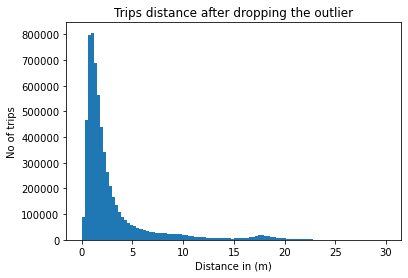

In [72]:
#Display the trip distance
#after dropping the outliers

plt.hist(df_train_val['trip_distance'].values,bins=100)
plt.xlabel('Distance in (m)')
plt.ylabel('No of trips')
plt.title('Trips distance after dropping the outlier')

#Max trips lasted for shorter distances

In [73]:
#yellow_trip_df['avg_speed_kph']=yellow_trip_df['trip_distance']/yellow_trip_df['trip_duration']
#yellow_trip_df
#df_train['trip_duration'].value_counts()

## Trip Duration

In [74]:
df_train_val.trip_duration.value_counts().sort_values(ascending=False) 

6.500000       6467
8.183333       6435
7.683333       6399
7.516667       6391
7.850000       6299
               ... 
146.766667        1
1391.933333       1
119.066667        1
483.033333        1
325.216667        1
Name: trip_duration, Length: 12295, dtype: int64

In [75]:
#we checked on the datafram and we donn't found a trip duration less than 2,for this reason we choosed 2
df_train_val=df_train_val[df_train_val.trip_duration>2]
df_train_val=df_train_val[df_train_val.trip_duration<30]

In [76]:
df_test=df_test[df_test.trip_duration>2]
df_test=df_test[df_test.trip_duration<30]

### Setting up for modeling and building a baseline:

### Clarify the correlations between whole features

In [77]:
df_train_val.corr()

,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,pickup_day_num,dropoff_day_num,pickup_day_30,dropoff_day_30,pickup_hour,dropoff_hour,trip_duration
VendorID,1.000000,0.167151,0.027359,0.006308,-0.010688,-0.005305,-0.017064,0.016259,-0.909571,0.003957,0.017342,0.006164,-0.006708,0.017919,-0.009368,0.011081,0.011231,0.001612,0.001619,0.000904,-0.000594,0.002232
passenger_count,0.167151,1.000000,0.005470,-0.000298,-0.005359,-0.004218,0.018214,0.005281,-0.148709,-0.000042,-0.007471,-0.000085,0.004287,0.003353,0.006743,0.031742,0.031901,-0.000204,-0.000249,0.015020,0.013552,0.008361
trip_distance,0.027359,0.005470,1.000000,0.255020,-0.075138,-0.098759,-0.012814,0.912340,-0.048487,-0.114874,0.434575,0.392217,0.000849,0.876825,-0.202262,0.021412,0.021510,-0.002239,-0.002163,-0.051321,-0.066317,0.639183
RatecodeID,0.006308,-0.000298,0.255020,1.000000,-0.015957,-0.002549,-0.001761,0.405206,-0.033699,-0.580092,0.196171,0.272003,-0.005241,0.401141,-0.112084,0.008508,0.008063,-0.000536,-0.000476,-0.025178,-0.027851,0.078712
PULocationID,-0.010688,-0.005359,-0.075138,-0.015957,1.000000,0.087131,-0.027639,-0.068644,0.024423,0.006294,-0.010266,-0.019092,0.000660,-0.051513,0.130933,-0.037723,-0.037991,0.001890,0.002075,0.023389,0.027667,-0.046829
DOLocationID,-0.005305,-0.004218,-0.098759,-0.002549,0.087131,1.000000,-0.030375,-0.089856,0.019376,0.021593,-0.018777,-0.024350,0.000244,-0.071479,0.125388,-0.032436,-0.032741,0.003564,0.003606,0.021077,0.025404,-0.071576
payment_type,-0.017064,0.018214,-0.012814,-0.001761,-0.027639,-0.030375,1.000000,-0.016130,-0.012552,0.000656,-0.588465,-0.018803,-0.011824,-0.166253,-0.122527,0.025272,0.024884,-0.002049,-0.001991,-0.016674,-0.014782,-0.025540
fare_amount,0.016259,0.005281,0.912340,0.405206,-0.068644,-0.089856,-0.016130,1.000000,-0.035842,-0.197208,0.472840,0.390857,0.000173,0.958344,-0.155820,0.011792,0.012092,0.001802,0.001741,-0.024417,-0.032828,0.795877
extra,-0.909571,-0.148709,-0.048487,-0.033699,0.024423,0.019376,-0.012552,-0.035842,1.000000,0.021446,0.005717,-0.018823,0.000258,-0.004074,0.155759,-0.058669,-0.058345,-0.001214,-0.001275,0.124567,0.120839,-0.005070
mta_tax,0.003957,-0.000042,-0.114874,-0.580092,0.006294,0.021593,0.000656,-0.197208,0.021446,1.000000,-0.098512,-0.208065,-0.018776,-0.202714,0.099753,-0.005082,-0.005102,0.000342,0.000369,0.016402,0.015712,-0.037438


In [78]:
df_train_val.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5548803 entries, 4105733 to 1484405
Data columns (total 25 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               float64       
 1   tpep_pickup_datetime   datetime64[ns]
 2   tpep_dropoff_datetime  datetime64[ns]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           float64       
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  pickup_day_num  

In [79]:
df_train_val.describe()

,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,pickup_day_num,dropoff_day_num,pickup_day_30,dropoff_day_30,pickup_hour,dropoff_hour,trip_duration
count,5.548803e+06,5.548803e+06,5.548803e+06,5.548803e+06,5.548803e+06,5.548803e+06,5.548803e+06,5.548803e+06,5.548803e+06,5.548803e+06,5.548803e+06,5.548803e+06,5.548803e+06,5.548803e+06,5.548803e+06,5.548803e+06,5.548803e+06,5.548803e+06,5.548803e+06,5.548803e+06,5.548803e+06,5.548803e+06
mean,1.665269e+00,1.567643e+00,2.175078e+00,1.009617e+00,1.654311e+02,1.634727e+02,1.271980e+00,1.076640e+01,1.122087e+00,4.994644e-01,1.922470e+00,1.385797e-01,2.999697e-01,1.631925e+01,2.358417e+00,2.908668e+00,2.912841e+00,1.606953e+01,1.606637e+01,1.392648e+01,1.394891e+01,1.238799e+01
std,4.718964e-01,1.171368e+00,2.146155e+00,1.492821e-01,6.629713e+01,6.924877e+01,4.592657e-01,6.484949e+00,1.225671e+00,1.831675e-02,1.934218e+00,1.235699e+00,3.013656e-03,8.129699e+00,5.778414e-01,1.884973e+00,1.887177e+00,8.972419e+00,8.972416e+00,6.068222e+00,6.145689e+00,6.758246e+00
min,1.000000e+00,1.000000e+00,1.000000e-02,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e-02,-1.662000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.100000e-01,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00
25%,1.000000e+00,1.000000e+00,9.700000e-01,1.000000e+00,1.160000e+02,1.130000e+02,1.000000e+00,6.500000e+00,0.000000e+00,5.000000e-01,0.000000e+00,0.000000e+00,3.000000e-01,1.130000e+01,2.500000e+00,1.000000e+00,1.000000e+00,8.000000e+00,8.000000e+00,1.000000e+01,1.000000e+01,6.950000e+00
50%,2.000000e+00,1.000000e+00,1.510000e+00,1.000000e+00,1.620000e+02,1.620000e+02,1.000000e+00,9.000000e+00,5.000000e-01,5.000000e-01,1.950000e+00,0.000000e+00,3.000000e-01,1.430000e+01,2.500000e+00,3.000000e+00,3.000000e+00,1.600000e+01,1.600000e+01,1.500000e+01,1.500000e+01,1.108333e+01
75%,2.000000e+00,2.000000e+00,2.500000e+00,1.000000e+00,2.340000e+02,2.340000e+02,2.000000e+00,1.300000e+01,2.500000e+00,5.000000e-01,2.850000e+00,0.000000e+00,3.000000e-01,1.880000e+01,2.500000e+00,4.000000e+00,4.000000e+00,2.400000e+01,2.400000e+01,1.900000e+01,1.900000e+01,1.681667e+01
max,2.000000e+00,9.000000e+00,2.999000e+01,6.000000e+00,2.650000e+02,2.650000e+02,4.000000e+00,9.950000e+01,7.500000e+00,1.942000e+01,3.535000e+02,9.125000e+02,3.000000e-01,9.608000e+02,2.750000e+00,6.000000e+00,6.000000e+00,3.100000e+01,3.100000e+01,2.300000e+01,2.300000e+01,2.998333e+01


There are alot of variables, Let's pick out just a few columns and start building models using that.

##  Visualizing "Multivarite features" to understand the relationship between independent (features_X) and dependent (Y_feature= Fare amount).

### The distibution between fare amount and trip duration

Text(0.5, 1.0, 'Trip duration(in min) distribution')

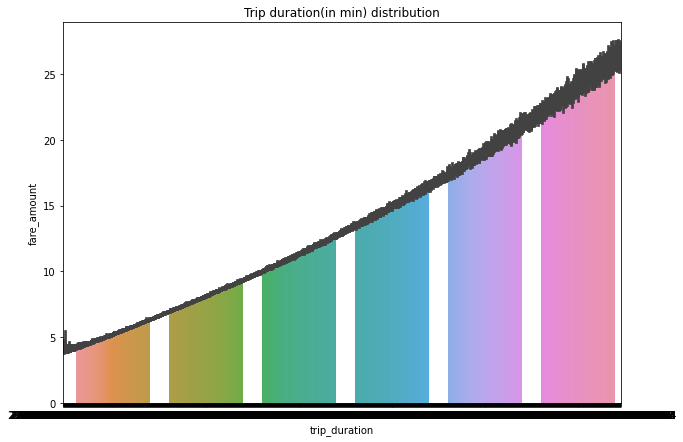

In [80]:
#Plotting to show the fare amount in trip duration 
plt.figure(figsize=(10,7))
sns.barplot(x='trip_duration',y='fare_amount',data=df_train_val)
plt.title('Trip duration(in min) distribution')

### The distibution between fare amount and passenger counts

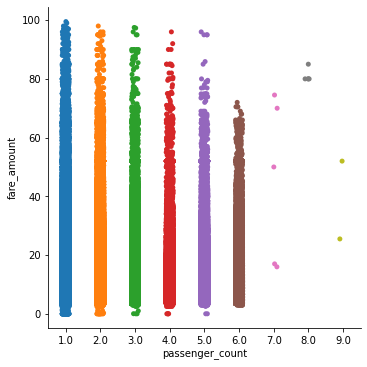

In [81]:
sns.catplot(x='passenger_count',y='fare_amount',data=df_train_val)

### The distibution between fare amount and trip distance

<AxesSubplot:xlabel='trip_distance', ylabel='fare_amount'>

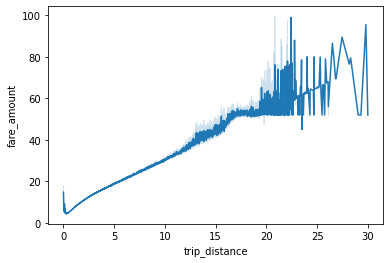

In [82]:
sns.lineplot(x='trip_distance',y='fare_amount',data=df_train_val)


### The distibution between fare amount and month 10

<Figure size 432x576 with 0 Axes>

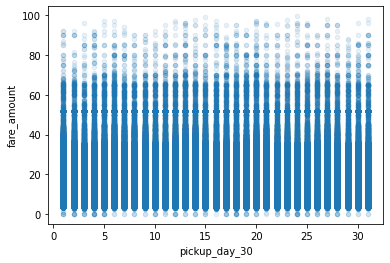

In [83]:
plt.figure(figsize=(6,8))
df_train_val.plot(kind="scatter", x="pickup_day_30", y="fare_amount", alpha=0.1);

### The distibution between fare amount and weekdays

Text(0.5, 1.0, 'the distribution between fare amount and pickup_day_30')

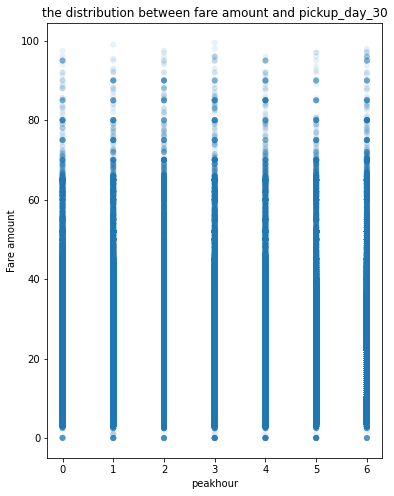

In [84]:
plt.figure(figsize=(6,8))
sns.scatterplot(x='pickup_day_num',y='fare_amount',data=df_train_val,edgecolor='None',alpha=0.1)
plt.xlabel('peakhour')
plt.ylabel('Fare amount')
plt.title('the distribution between fare amount and pickup_day_30')

### The distibution between fare amount and pickup hours

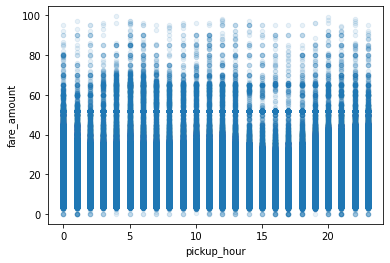

In [85]:
df_train_val.plot(kind="scatter", x="pickup_hour", y="fare_amount",alpha=0.1);

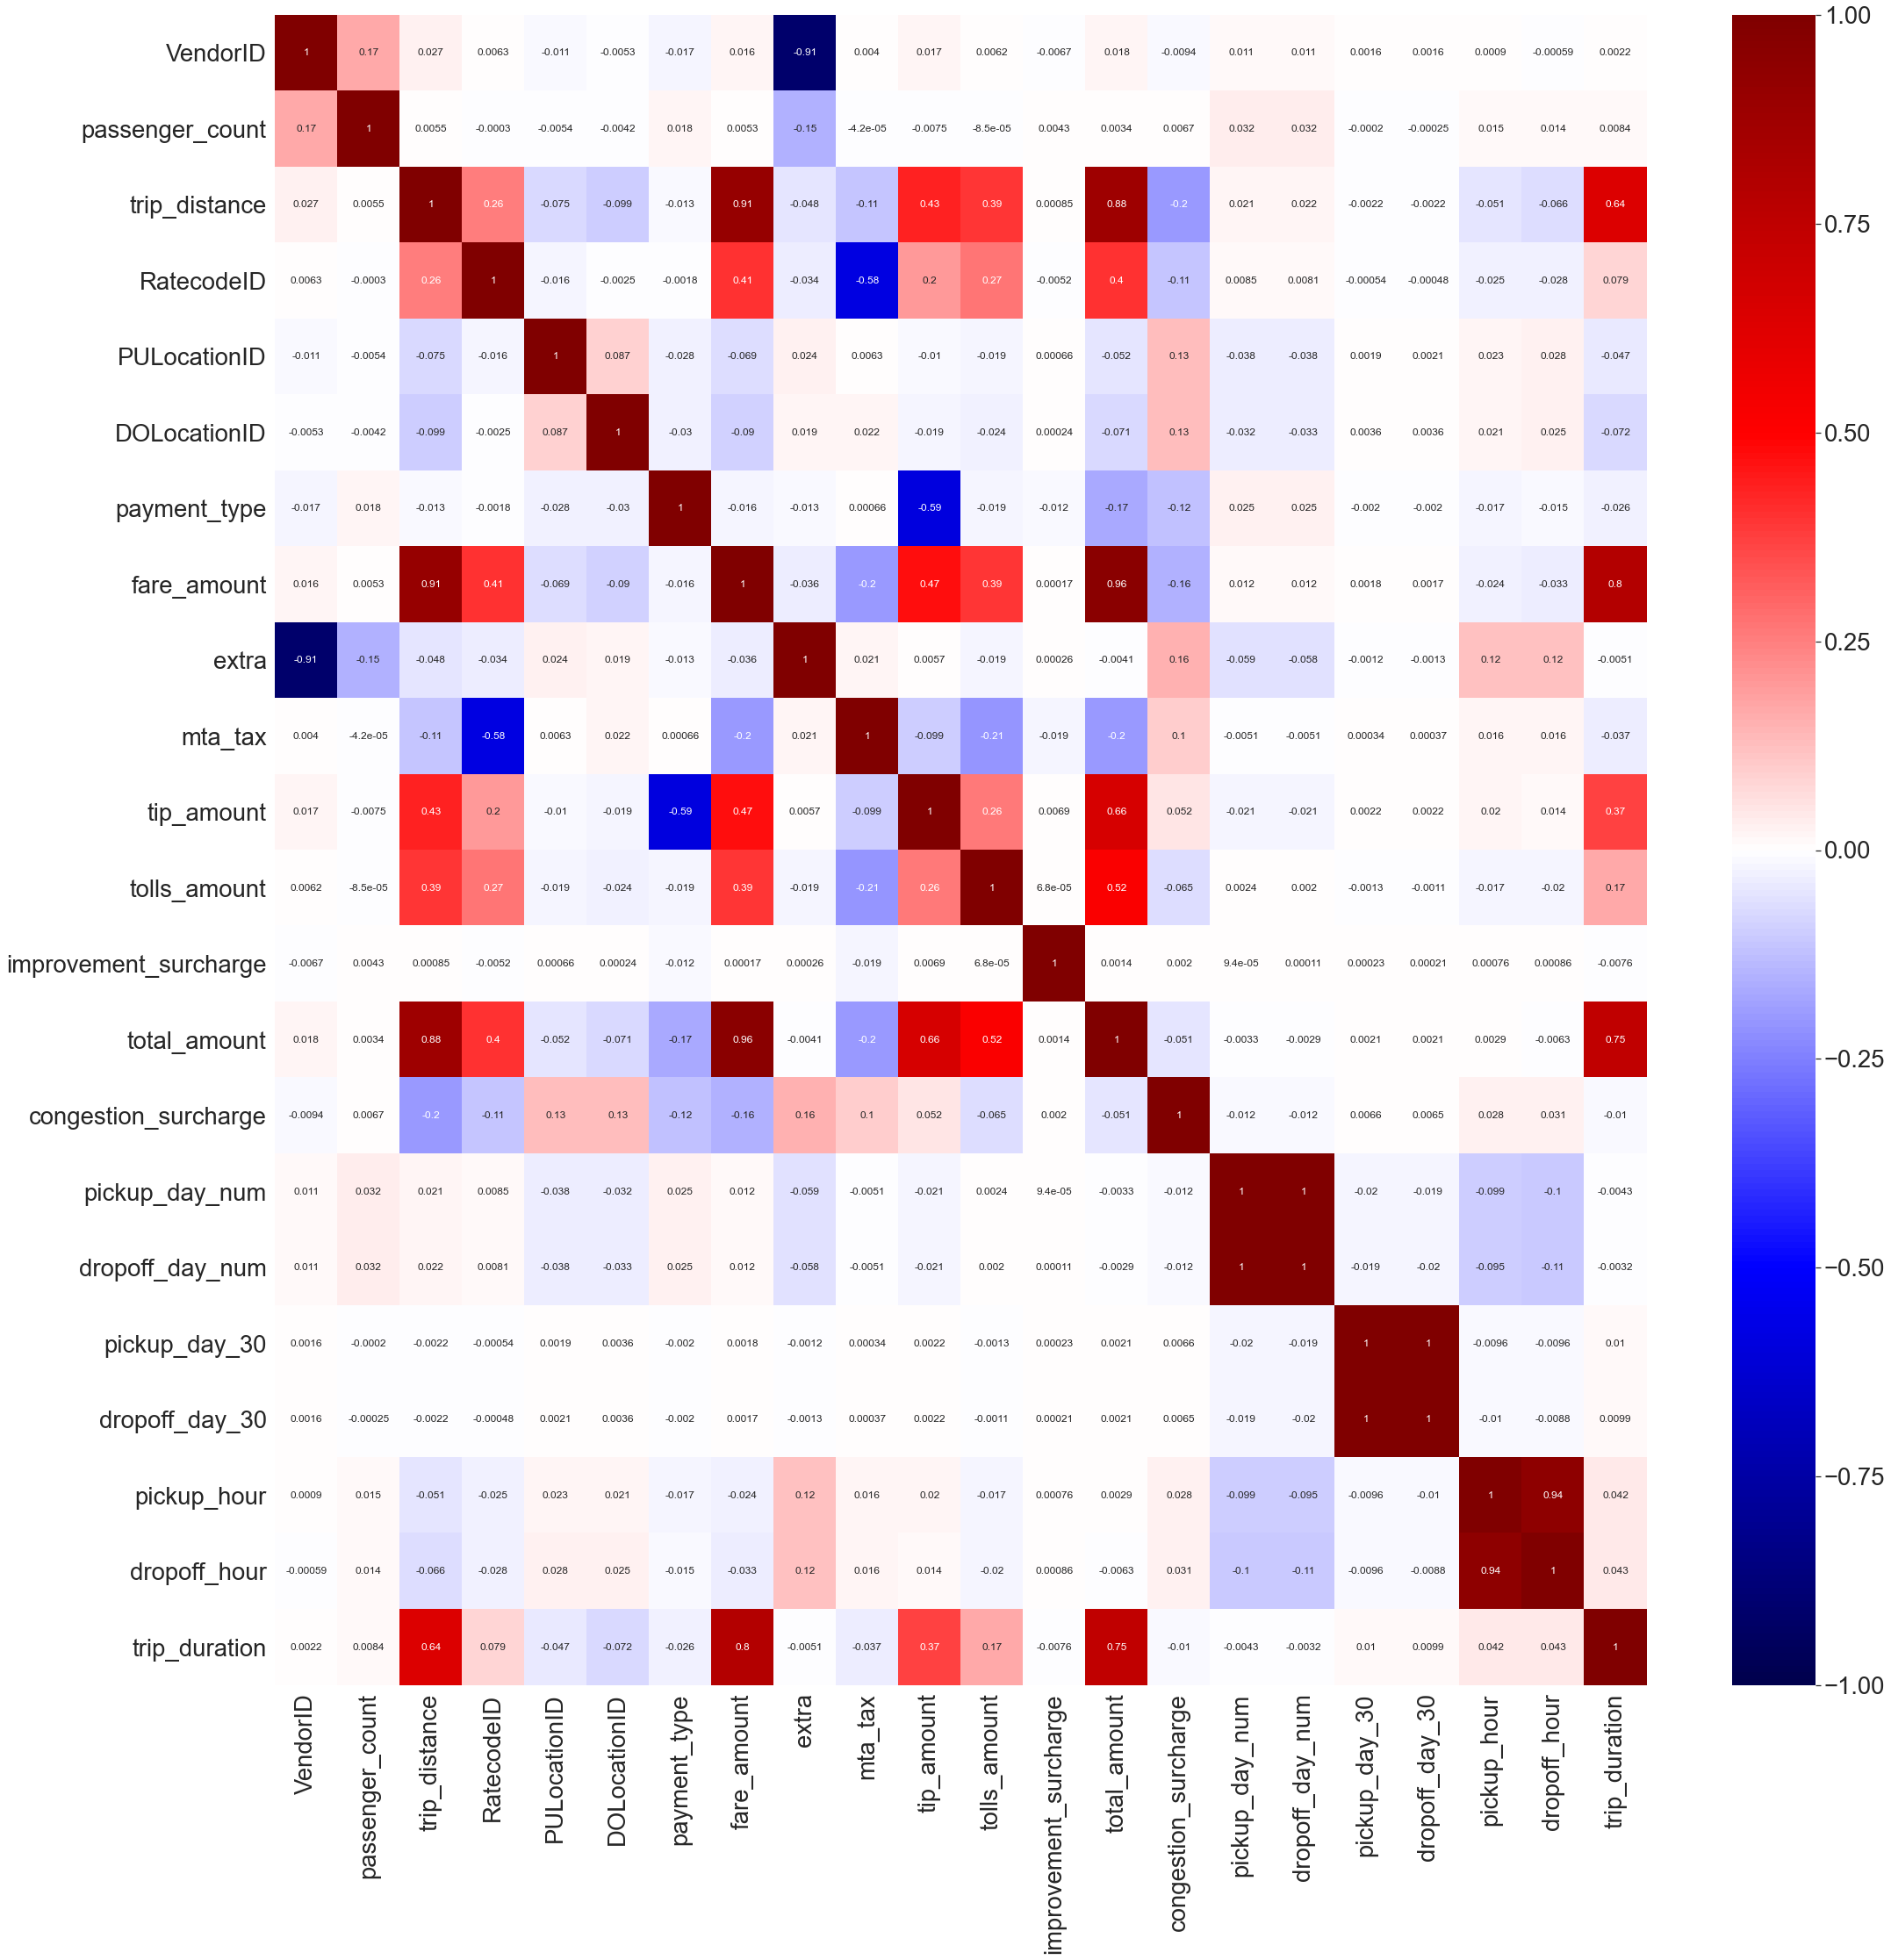

In [86]:
#Corr matrix for whole df_train_val features
sns.set(font_scale=2.5)
fig, ax = plt.subplots(figsize=(35,35)) 
sns.heatmap(df_train_val.corr(), cmap="seismic", annot=True, vmin=-1, vmax=1, annot_kws={"size":12});

In [87]:
df_train_val.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'pickup_day_num',
       'dropoff_day_num', 'pickup_day_30', 'dropoff_day_30', 'pickup_hour',
       'dropoff_hour', 'trip_duration'],
      dtype='object')

In [88]:
smaller_df=df_train_val.loc[:,['trip_distance','trip_duration','fare_amount','pickup_day_num','pickup_day_30','pickup_hour']]

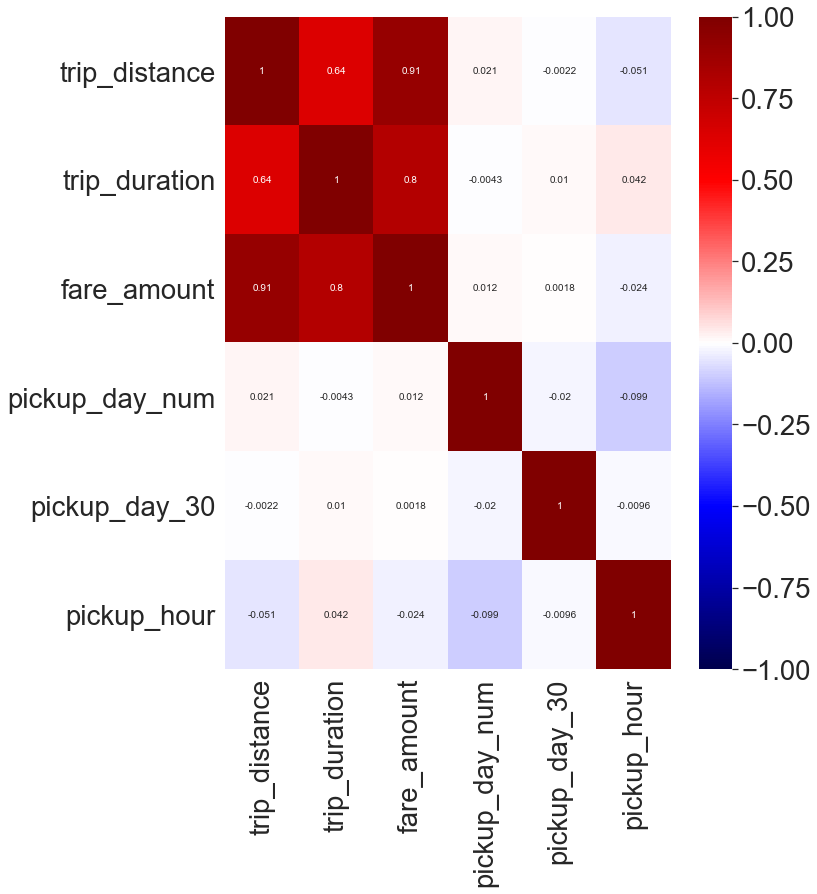

In [89]:
#To see a better corr matrix
sns.set(font_scale=2.5)
fig, ax = plt.subplots(figsize=(10,12)) 
sns.heatmap(smaller_df.corr(), cmap="seismic", annot=True, vmin=-1, vmax=1, annot_kws={"size":10});

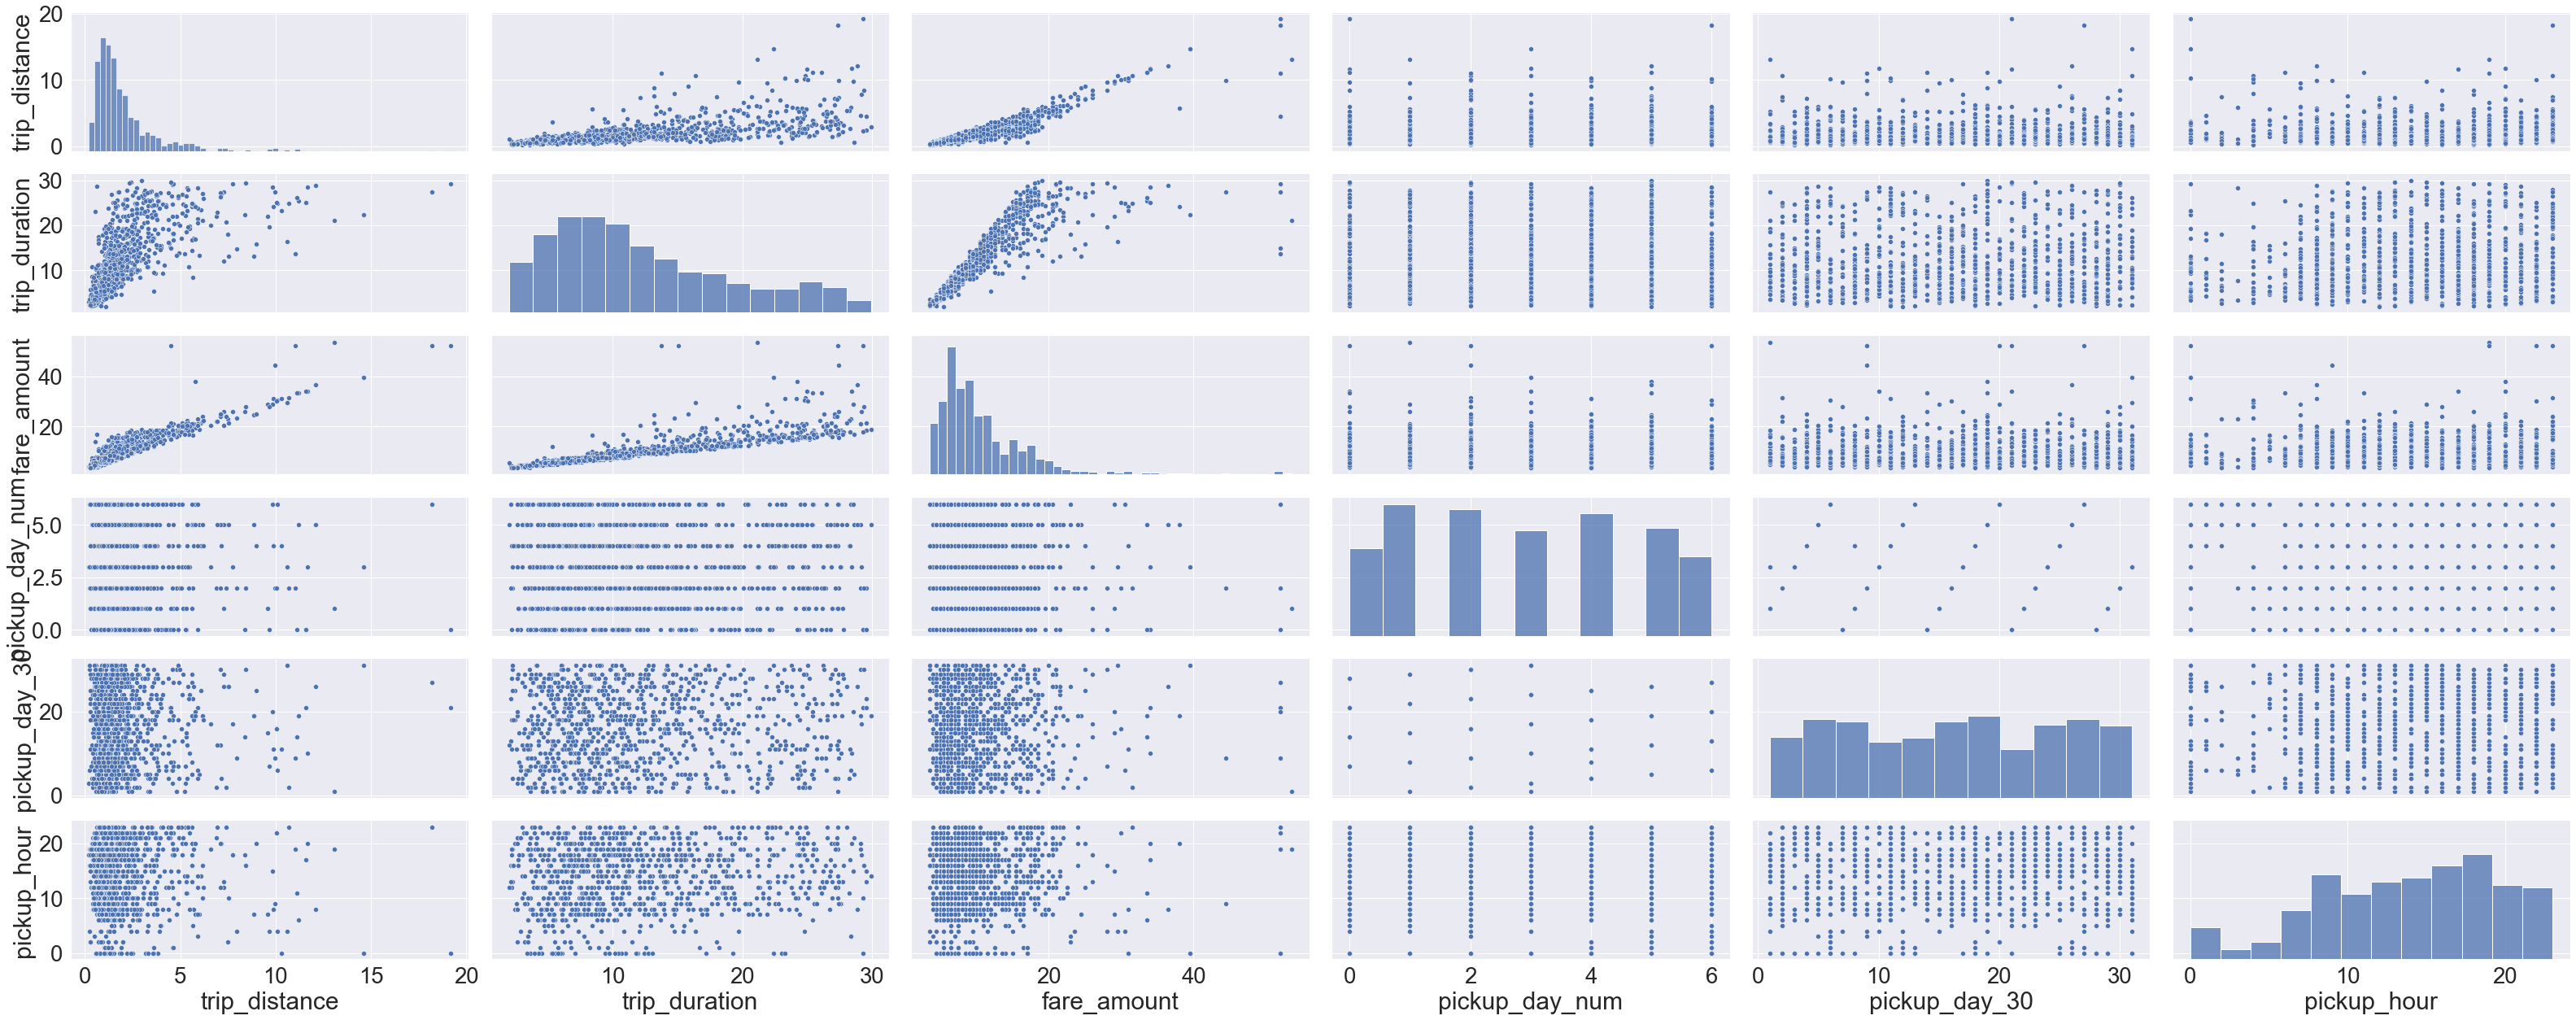

In [90]:
# Plot all of the variable-to-variable relations as scatterplots
sns.pairplot(smaller_df[:1000], height=3, aspect=2.5);

In [91]:
# The figure above display the correlation between the features and the target, for this i choose only two features
x,y = df_train_val.loc[:,['trip_distance','trip_duration']], df_train_val['fare_amount']
x_test,y_test = df_test.loc[:,['trip_distance','trip_duration']], df_test['fare_amount']

In [92]:
def split_and_validate(X, y):
    '''
    For a set of features and target X, y, perform a 80/20 train/val split, 
    fit and validate a linear regression model, and report results
    '''
    
    # perform train/val split
    X_train, X_val, y_train, y_val = \
        train_test_split(X, y, test_size=0.2, random_state=42)
    
    # fit linear regression to training data
    lr_model = LinearRegression()
    lr_model.fit(X_train, y_train)
    
    # score fit model on validation data
    val_score = lr_model.score(X_val, y_val)
    tra_score = lr_model.score(X_train, y_train)

    # report results
    print('\nTraining R^2 score was:', tra_score)
    print('\nValidation R^2 score was:', val_score)
    print('\nFeature coefficient results: \n')
    for feature, coef in zip(X.columns, lr_model.coef_):
        print(feature, ':', f'{coef:.2f}') 
        

### Ordinary Least Squares Regression with Statsmodels

In [93]:
# Create your model
model = sm.OLS(y, x)

# Fit your model to your training set
fit = model.fit()

# Print summary statistics of the model's performance
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            fare_amount   R-squared (uncentered):                   0.970
Model:                            OLS   Adj. R-squared (uncentered):              0.970
Method:                 Least Squares   F-statistic:                          8.957e+07
Date:                Sun, 05 Dec 2021   Prob (F-statistic):                        0.00
Time:                        09:28:01   Log-Likelihood:                     -1.2194e+07
No. Observations:             5548803   AIC:                                  2.439e+07
Df Residuals:                 5548801   BIC:                                  2.439e+07
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
trip_distance     2.0053      0.001   3596.147      0.000       2.004       2.006
trip_duration     0.4802      0.000   3977.076      0.000       0.480       0.480
==============================================================================
Omnibus:                 10228504.495   Durbin-Watson:                   1.913
Prob(Omnibus):                  0.000   Jarque-Bera (JB):      19766216669.659
Skew:                          13.829   Prob(JB):                         0.00
Kurtosis:                     294.082   Cond. No.                         8.79
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

From the above figure we see the scores suggest that the model found some important features and marked all other features with a zero coefficient, as we will drop it from the model

In [94]:
split_and_validate(x, y)


Training R^2 score was: 0.9091184287002336

Validation R^2 score was: 0.9078994025665901

Feature coefficient results: 

trip_distance : 2.06
trip_duration : 0.35


we need to enhance this model more

## Features Engineering - Polynomial Regression

## Adding categrical feature after transfer it to dummy variables

In [95]:
pd.get_dummies(df_train_val['RatecodeID'],drop_first=True)
#For test-set
pd.get_dummies(df_test['RatecodeID'],drop_first=True)


,2.0,3.0,4.0,5.0,6.0
5964823,0,0,0,0,0
678197,0,0,0,0,0
3327421,0,0,0,0,0
3910079,0,0,0,0,0
1259510,0,0,0,0,0
...,...,...,...,...,...
2472724,0,0,0,0,0
912977,0,0,0,0,0
7161019,0,0,0,0,0
286452,0,0,0,0,0


In [96]:
pd.get_dummies(df_train_val['VendorID'],drop_first=True)
#Test-set
pd.get_dummies(df_test['VendorID'],drop_first=True)

,2.0
5964823,0
678197,1
3327421,0
3910079,1
1259510,1
...,...
2472724,1
912977,1
7161019,1
286452,0


In [97]:
#pd.get_dummies(df_train_val['store_and_fwd_flag'],drop_first=True)

In [98]:
#add a new features after transferd it to dummy variables and chech the score
x1 = x.copy()
x1['RatecodeID'] = df_train_val['RatecodeID']
x1['VendorID'] = df_train_val['VendorID']
#x1['store_and_fwd_flag'] = df_train_val['store_and_fwd_flag']

split_and_validate(pd.get_dummies(x1), y)

#For test set
x1_test = x_test.copy()
x1_test['RatecodeID'] = df_test['RatecodeID']
x1_test['VendorID'] = df_test['VendorID']


Training R^2 score was: 0.9534843988121637

Validation R^2 score was: 0.9534026940961605

Feature coefficient results: 

trip_distance : 1.83
trip_duration : 0.38
RatecodeID : 9.51
VendorID : -0.04


## Adding polynomial Features

In [99]:
x2 = x1.copy()

In [100]:
x2_test = x1_test.copy()

In [101]:
#add a new feature to see how the number of passengers will affect on the fare_amount 
x2['is_van'] = np.where(df_train_val['passenger_count'] >= 2, 1, 0)
#for test-set
x2_test['is_van'] = np.where(df_test['passenger_count'] >= 2, 1, 0)

print(df_train_val.passenger_count.mode())

0    1.0
dtype: float64


In [102]:
# Dafine a function to set is the trip in peak hours or not?
def peakHour(h): 
    if h >= 17 and h<=20:
        return 1
    elif h >= 8 and h <= 15:
        return 1
    else:
        return 0

In [103]:
#add anthor feature to see how Peak hours will effect on the fare_amount 
x2['peakHours'] = df_train_val.loc[:,'pickup_hour'].apply(peakHour)
#For test-set
x2_test['peakHours'] = df_test.loc[:,'pickup_hour'].apply(peakHour)

print(df_train_val.pickup_hour.mode())

0    18
dtype: int64


In [104]:
# add more featurs to see how the peak days will effect also on the fare amount 
def peakDays(d): 
    if d >= 1 and d < 4:
        return 1
    else:
        return 0

In [105]:
x2['peakDays'] = df_train_val.loc[:,'pickup_day_num'].apply(peakDays)
#For test-set
x2_test['peakDays'] = df_test.loc[:,'pickup_day_num'].apply(peakDays)

print(df_train_val.pickup_day_num.mode())


0    3
dtype: int64


In [106]:
def isWeekend(w): 
    if w >= 2 and w < 5:
        return 1
    elif w >=7 and w<=12:
        return 1
    elif w>= 15 and w<= 19:
        return 1 
    elif w>= 23 and w<= 27:
        return 1
    elif w>= 29 and w <= 31:
        return 1
    else:
        return 0

In [107]:
x2['isWeekend'] = df_train_val.loc[:,'pickup_day_30'].apply(isWeekend)
#For test-set
x2_test['isWeekend'] = df_test.loc[:,'pickup_day_30'].apply(isWeekend)

print(df_train_val.pickup_day_30.mode())

0    18
dtype: int64


In [108]:
x2.columns

Index(['trip_distance', 'trip_duration', 'RatecodeID', 'VendorID', 'is_van',
       'peakHours', 'peakDays', 'isWeekend'],
      dtype='object')

In [109]:
split_and_validate(x2, y)


Training R^2 score was: 0.9535732866570137

Validation R^2 score was: 0.9534957172580999

Feature coefficient results: 

trip_distance : 1.84
trip_duration : 0.37
RatecodeID : 9.50
VendorID : -0.03
is_van : -0.00
peakHours : 0.13
peakDays : 0.02
isWeekend : 0.02


## Adding polynomial terms or transformations

One of the first things that we looked for in the pairplot was evidence about the relationship between each feature and the target. In certain features like 'congestion_surcharge' and 'extra', we notice an upward-curved relationship rather than a simple linear correspondence. This suggests that we should add quadratic polynomial terms or transformations for those features, allowing us to express that non-linear relationship while still using linear regression as our model.

In [128]:
x3 = x2.copy()

x3['ph'] = x3['peakHours'] ** 2
x3['pd'] = x3['peakDays'] ** 2
x3['iw'] = x3['isWeekend'] ** 2

#For tset-set
x3_test = x2_test.copy()

x3_test['ph'] = x3_test['peakHours'] ** 2
x3_test['pd'] = x3_test['peakDays'] ** 2
x3_test['iw'] = x3_test['isWeekend'] ** 2


split_and_validate(x3, y)


Training R^2 score was: 0.9535732854422124

Validation R^2 score was: 0.953495747168152

Feature coefficient results: 

trip_distance : 1.84
trip_duration : 0.37
RatecodeID : 9.50
VendorID : -0.03
is_van : -0.00
peakHours : 6660954242.29
peakDays : -2981131544.26
isWeekend : -72518836464.38
ph : -6660954242.16
pd : 2981131544.28
iw : 72518836464.40


## Adding interaction terms
With our current feature set, each feature value has no influence over how the model views other features' values. Each feature is treated as a completely independent quantity. However, there may easily be interaction effects present, in which the impact of one feature may dependent on the current value of a different feature.

In [129]:
x4 = x3.copy()

# multiplicative interaction
x4['h-d'] = x4['peakHours'] * x4['trip_distance']
x4['D_h'] = x4['isWeekend'] * x4['trip_distance']
x4['D_h'] = x4['peakDays'] * x4['trip_distance']
# x4['Distance_in_Time']=x4['trip_duration'] * x4['trip_distance']

#for Test set
x4_test = x3_test.copy()
# multiplicative interaction
x4_test['h-d'] = x4_test['peakHours'] * x4_test['trip_distance']
x4_test['D_h'] = x4_test['isWeekend'] * x4_test['trip_distance']
x4_test['D_h'] = x4_test['peakDays'] * x4_test['trip_distance']
# x4_test['Distance_in_Time']=x4_test['trip_duration'] * x4_test['trip_distance']

split_and_validate(x4, y)


Training R^2 score was: 0.9536057427526801

Validation R^2 score was: 0.9535248829207535

Feature coefficient results: 

trip_distance : 1.86
trip_duration : 0.37
RatecodeID : 9.48
VendorID : -0.03
is_van : -0.00
peakHours : 11425751379.92
peakDays : -5421076588.16
isWeekend : 248317153.96
ph : -11425751379.73
pd : 5421076588.22
iw : -248317153.95
h-d : -0.03
D_h : -0.02


**Benchmarks that i follow in choosing the best model**:

> 1. Baseline feature set: ~.90789 R^2 
> 3. Add Category features (RatecodeID,VendorID): ~.95340 R^2
> 4. Add polynomial features: ~.95349 R^2
> 5. Add Several interaction terms: ~.95352 R^2
 

## Standard-scaling Features 

In [116]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [117]:
#set up the  models we're choosing from:

lm = LinearRegression()

#Feature scaling for train, val, and test so that we can run our ridge model on each
scaler = StandardScaler()

x5 = scaler.fit_transform(x4.values)
#X_val_scaled = scaler.transform(X_val.values)
x5_test = scaler.transform(x4_test.values)

(array([5.076115e+06, 3.357930e+05, 8.722100e+04, 3.250600e+04,
        7.974000e+03, 6.680000e+03, 2.331000e+03, 1.640000e+02,
        1.600000e+01, 3.000000e+00]),
 array([-0.58500681,  1.11211535,  2.80923752,  4.50635968,  6.20348185,
         7.90060402,  9.59772618, 11.29484835, 12.99197052, 14.68909268,
        16.38621485]),
 <BarContainer object of 10 artists>)

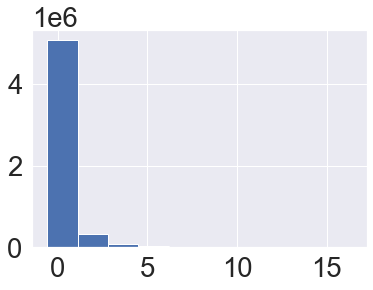

In [120]:
## Here we can plot histograms of the transformed variables
## Note that they seem to have means of 0 and stddevs of 1
## (though they are not necessarily normally distributed)
plt.hist(x5[:,10])

## Test Set

In [121]:
x2_test

,trip_distance,trip_duration,RatecodeID,VendorID,is_van,peakHours,peakDays,isWeekend
5964823,1.30,10.166667,1.0,1.0,1,1,0,1
678197,2.46,13.466667,1.0,2.0,0,0,1,1
3327421,2.60,16.000000,1.0,1.0,0,1,1,1
3910079,0.72,3.666667,1.0,2.0,0,0,0,1
1259510,0.43,4.916667,1.0,2.0,0,1,0,0
...,...,...,...,...,...,...,...,...
2472724,0.91,7.800000,1.0,2.0,1,1,0,1
912977,0.46,6.233333,1.0,2.0,0,1,0,1
7161019,1.70,6.883333,1.0,2.0,0,0,1,1
286452,1.40,8.200000,1.0,1.0,0,1,1,1


In [122]:
x2.columns

Index(['trip_distance', 'trip_duration', 'RatecodeID', 'VendorID', 'is_van',
       'peakHours', 'peakDays', 'isWeekend'],
      dtype='object')

Text(0.5, 1.0, '')

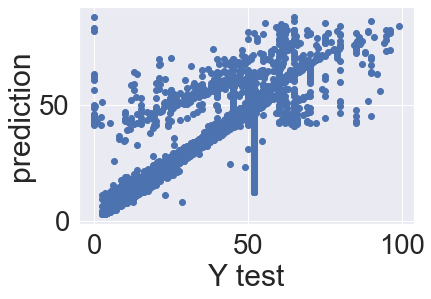

In [127]:
lm = LinearRegression() # construct LinearRegression model object

lm.fit(x5, y) #fit model to features X_train, target y_train

preds=lm.predict(x5_test) # generate predictions for X_test using fit model


plt.scatter(y_test,preds)
plt.xlabel('Y test')
plt.ylabel('prediction')
plt.title('')


In [124]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

rmse = mean_squared_error(y_test, preds, squared=False)
mae = mean_absolute_error(y_test, preds)

In [125]:
print(rmse)
print(mae)

1.4086979799510435
0.41391811577253645
